/Users/holtw/Documents/mydocs/software/pde-examples/.venv/lib/python3.11/site-packages/fipy/variables/variable.py:1141: RuntimeWarning: invalid value encountered in divide
  return self._BinaryOperatorVariable(lambda a, b: a / b, other)
/Users/holtw/.pyenv/versions/3.11.9/lib/python3.11/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


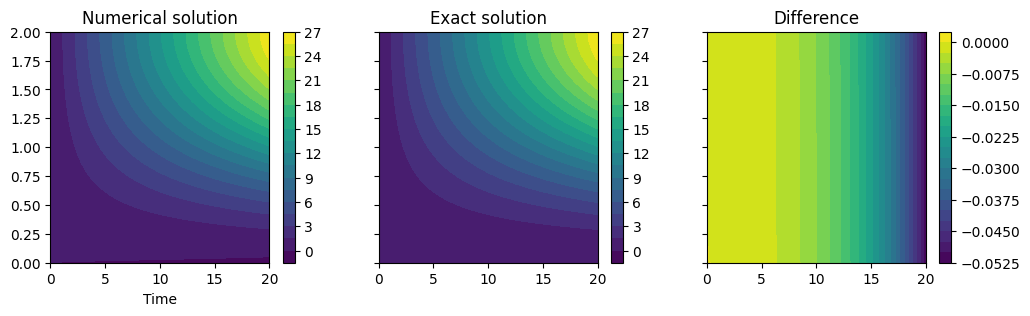

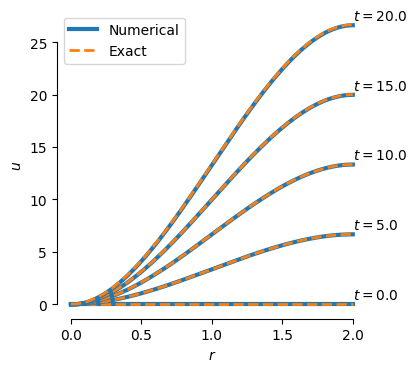

In [1]:
from problem_def import PhysicalSystem

# These are the physical parameters
R = 2.0
a = 1.0
b = 1e-2
m = 0.0

# These are the diffusion/convection coefficients
def diff_coef(r, args):
    R, a = args['R'], args['a']
    return a*(r**2 + R**2)

def conv_coef(r, args):
    R, b = args['R'], args['b']
    return b*(r**2 + R**2)

# This is what we are setting the solution to be
def exact_solution(t, r, args):
    R, m = args['R'], args['m']
    return (R/2 - r/3)*r**2*(t + m)

class PhysicalSystemForVerification(PhysicalSystem):
    """A convection-diffusion system in a 1D sphere with a known exact solution. Used for code verification."""

    def source(self, t, r):
        """Source term for the right-hand side of the PDE."""
        # This source term is derived from the exact solution
        return self.source_for_verification(t, r)

    def diff_coef(self, r, args):
        """Diffusion coefficient."""
        return diff_coef(r, args)
    
    def conv_coef(self, r, args):
        """Convection coefficient (i.e., the velocity)."""
        return conv_coef(r, args)

# Initialize the system
system = PhysicalSystemForVerification(
    R=R,
    n_grid=1000,
    a=a,
    b=b,
    m=m,
    exact_solution=exact_solution
)

# Solve it
system.solve(final_time=20.0, dt=0.05)

# Make plots
system.plot_solution_vs_ground_truth();
system.plot_solution_evolution(plot_times=[0.0, 5.0, 10.0, 15.0, 20.0]);
system.create_solution_video("solution.mp4");